# Preprocessing using ELT
ELT is short for Extract Load Transform, witch means that we first extract the data, then load it in using python, then we trnasform the data to something that we can use for further exploration of the data. 

First of, we load the csv files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

dogeDF_full = pd.read_csv('../data/doge.csv')

dogeDF = pd.DataFrame(dogeDF_full, columns=['date', 'PriceUSD'])

print(dogeDF.isnull().sum())
dogeDF['date'].head()

date         0
PriceUSD    46
dtype: int64


0    2013-12-08
1    2013-12-09
2    2013-12-10
3    2013-12-11
4    2013-12-12
Name: date, dtype: object

In [7]:
ethDF_full = pd.read_csv('../data/eth.csv')

ethDF = pd.DataFrame(ethDF_full, columns=['date', 'PriceUSD'])

ethDF.isnull().sum()
ethDF['date'].head()

0    2015-07-30
1    2015-07-31
2    2015-08-01
3    2015-08-02
4    2015-08-03
Name: date, dtype: object

In [8]:
btcDF_full = pd.read_csv('../data/btc.csv')

btcDF = pd.DataFrame(btcDF_full, columns=['date', 'PriceUSD'])

btcDF.isnull().sum()
btcDF['date'].head()

0    2009-01-03
1    2009-01-04
2    2009-01-05
3    2009-01-06
4    2009-01-07
Name: date, dtype: object

In [34]:
usdDF = pd.read_csv('../data/usd.csv')

for i in range(len(usdDF['Date'])):
    #01/31/91
    newarr = usdDF['Date'][i].split('/')
    if newarr[2] > str(22):
        s = '19' + str(newarr[2]) + '-' + str(newarr[0]) + '-' + str(newarr[1])
    else:
        s = '20' + str(newarr[2]) + '-' + str(newarr[0]) + '-' + str(newarr[1])
    
    usdDF['Date'][i] = s
    #2009-01-07

usdDF.sort_values(by=['Date'], inplace=True, ascending=True)

usdDF


<ipython-input-34-ca0c32bae6c5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usdDF['Date'][i] = s


,Date,Open,High,Low,Close
9005,1986-01-20,124.87,124.93,124.52,124.59
9004,1986-01-21,124.40,124.63,124.18,124.51
9003,1986-01-22,124.77,124.97,123.88,124.75
9002,1986-01-23,124.47,124.72,124.24,124.45
9001,1986-01-24,123.38,123.41,122.67,122.78
...,...,...,...,...,...
4,2021-04-26,90.86,90.99,90.68,90.81
3,2021-04-27,90.88,91.07,90.81,90.91
2,2021-04-28,90.90,91.13,90.55,90.61
1,2021-04-29,90.55,90.79,90.42,90.61


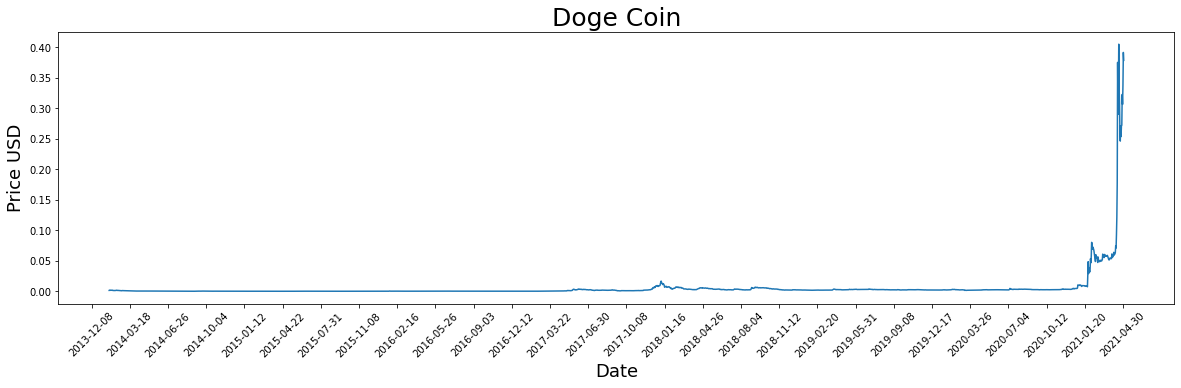

In [35]:
plt.figure(figsize=(20,5))
plt.plot(range(46, dogeDF.shape[0]),(dogeDF['PriceUSD'][46:]))
plt.xticks(range(0,dogeDF.shape[0],100),dogeDF['date'].loc[::100],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD',fontsize=18)
plt.title('Doge Coin',fontsize=25)
plt.show()

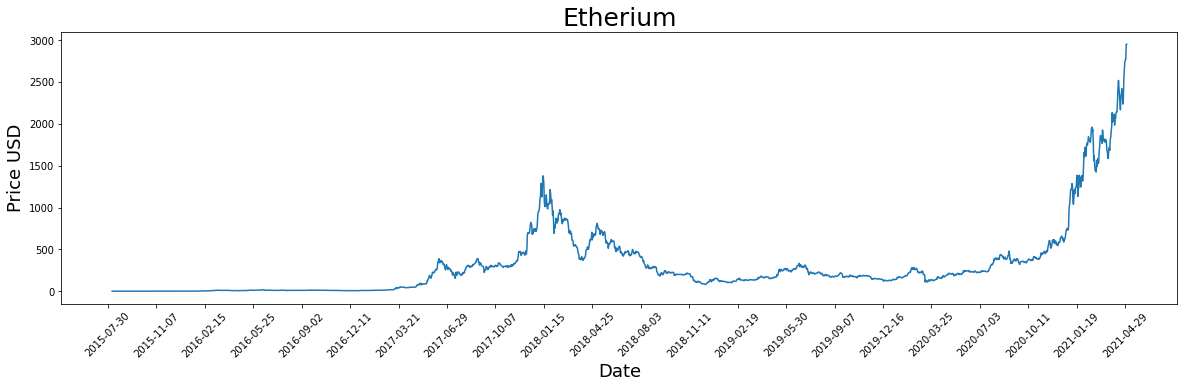

In [13]:
plt.figure(figsize=(20,5))
plt.plot(range(9, ethDF.shape[0]),(ethDF['PriceUSD'][9:]))
plt.xticks(range(0,ethDF.shape[0],100),ethDF['date'].loc[::100],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD',fontsize=18)
plt.title('Etherium', fontsize=25)
plt.show()

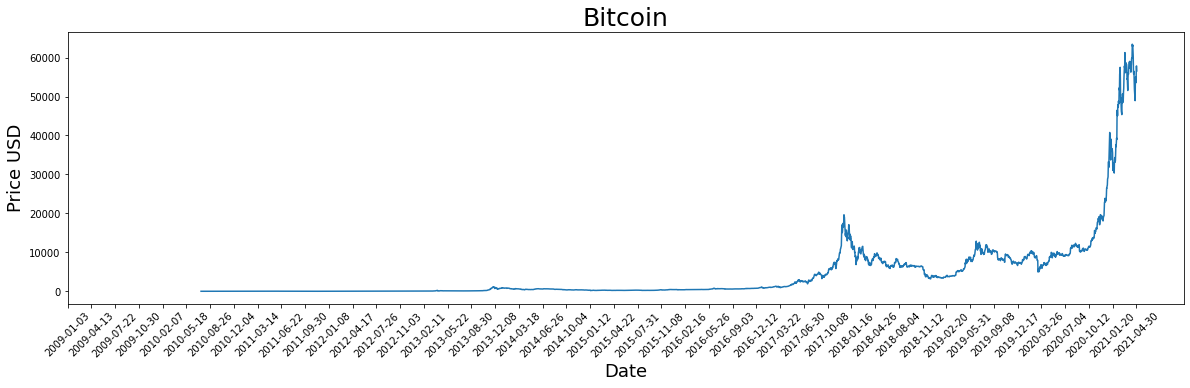

In [14]:
plt.figure(figsize=(20,5))
plt.plot(range(562, btcDF.shape[0]),(btcDF['PriceUSD'][562:]))
plt.xticks(range(0,btcDF.shape[0],100),btcDF['date'].loc[::100],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD',fontsize=18)
plt.title('Bitcoin', fontsize=25)
plt.show()

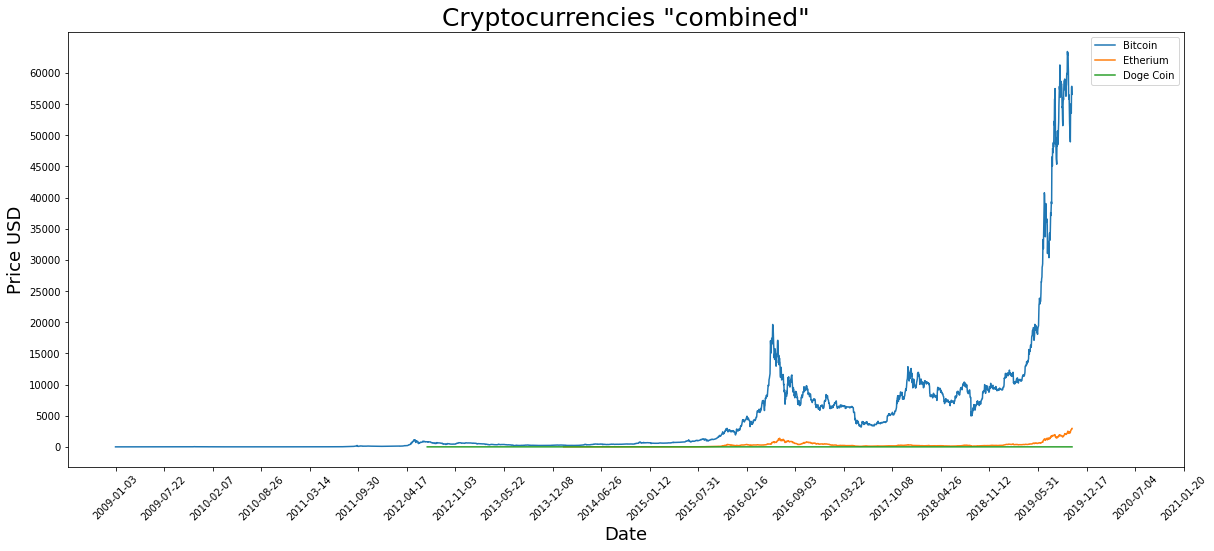

In [42]:
plt.figure(figsize=(20,8))
plt.plot(btcDF['date'][562:],btcDF['PriceUSD'][562:], label='Bitcoin')
plt.plot(ethDF['date'][9:],ethDF['PriceUSD'][9:], label='Etherium')
plt.plot(dogeDF['date'][46:],dogeDF['PriceUSD'][46:], label='Doge Coin')
plt.xticks(range(0,btcDF.shape[0],200),btcDF['date'].loc[::200],rotation=45)
plt.yticks(range(0,int(btcDF['PriceUSD'].max()), 5000))
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD',fontsize=18)
plt.title('Cryptocurrencies "combined"', fontsize=25)
plt.legend(loc='best')
plt.show()